In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

In [3]:
df

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [4]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

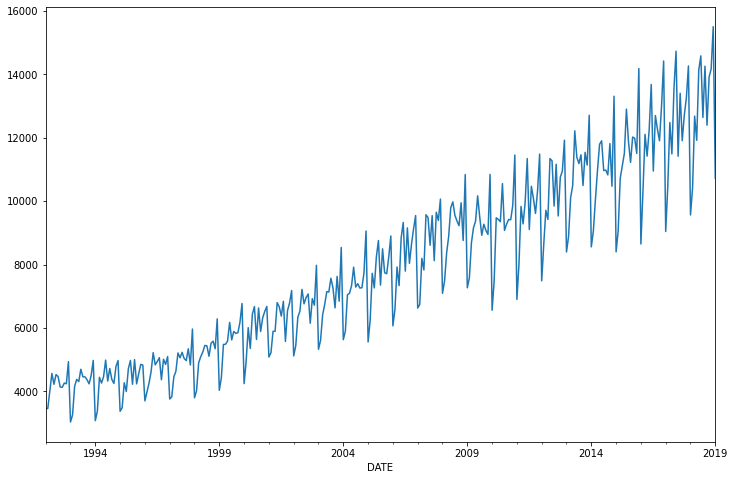

In [5]:
df['Sales'].plot(figsize=(12, 8))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
results = seasonal_decompose(df['Sales'])

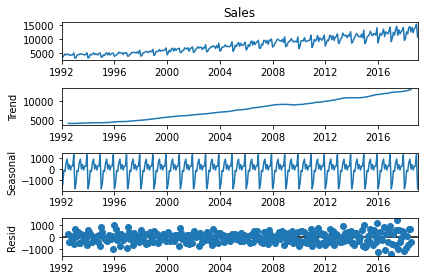

In [8]:
results.plot();

In [9]:
len(df)

325

In [10]:
325-12

313

In [11]:
train = df.iloc[:313]
test = df.iloc[313:]
len(train), len(test)

(313, 12)

In [12]:
ser = np.array([23, 56, 2, 13, 14])

In [13]:
ser.max() # fit

56

In [14]:
ser / ser.max() # transform

array([0.41071429, 1.        , 0.03571429, 0.23214286, 0.25      ])

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(train) # finds the max value in train data

MinMaxScaler()

In [18]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [25]:
scaled_train[:5]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ]])

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
n_input = 2
n_features = 1

In [21]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
X, y = generator[0]

In [23]:
X

array([[[0.03658432],
        [0.03649885]]])

In [26]:
y

array([[0.08299855]])

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [29]:
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [30]:
model = Sequential()

model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

NotImplementedError: Cannot convert a symbolic Tensor (lstm_1/strided_slice:0) to a numpy array.

In [ ]:
model.summary()